In [1]:
import os
import pathlib
import torch
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFilter

/home/felix/miniconda3/envs/dino/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.getcwd()

'/home/felix/dino/datasets'

In [11]:
path_to_mnist = r"."

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train

In [12]:
lambd = lambda img: img.convert('RGB')
convert_to_RGB = torchvision.transforms.Lambda(lambda img: img.convert('RGB'))

In [13]:
lambd = lambda img: img.filter(ImageFilter.SHARPEN)
sharpen = torchvision.transforms.Lambda(lambda img: img.filter(ImageFilter.SHARPEN))

In [14]:
transform=torchvision.transforms.Compose([
                              convert_to_RGB,
                              torchvision.transforms.Resize(size=256), 
                              sharpen,
                              torchvision.transforms.ToTensor()
                             ])

In [15]:
mnist_trainset = datasets.MNIST(root=path_to_mnist, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=1)

In [16]:
img, lbl = next(iter(train_loader))

In [17]:
img.shape

torch.Size([1, 3, 256, 256])

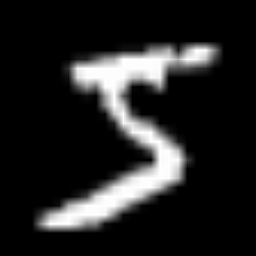

In [18]:
tmp_img = torchvision.transforms.functional.to_pil_image(img[0])
tmp_img.show()